In [ ]:
#ID NUMBER   : 190031094
#NAME        : Naveen  
#PRACTICAL   : #2 - Logical Regression   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
file = pd.read_csv('Iris.csv')
file

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
file.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
file.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

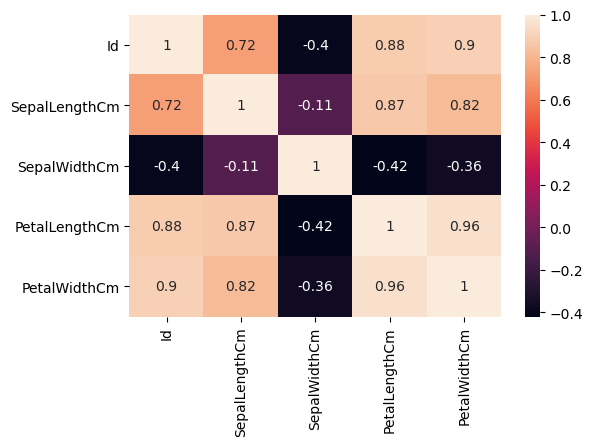

In [ ]:
plt.figure(dpi=100)
sns.heatmap(np.round(file.corr(),2),annot=True)
plt.show()

In [ ]:
file['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Changing categorical values into integers
spec = {'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

file.Species = [spec[x] for x in file.Species]
file

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

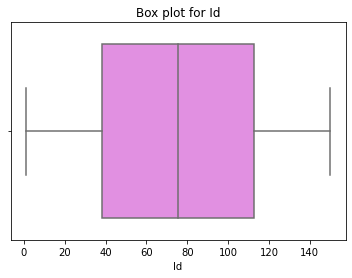

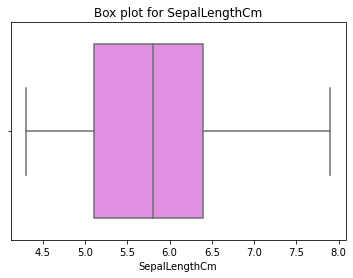

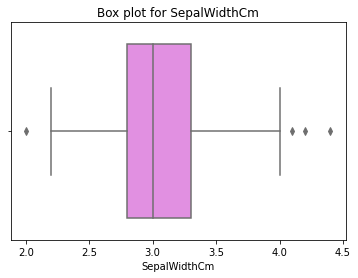

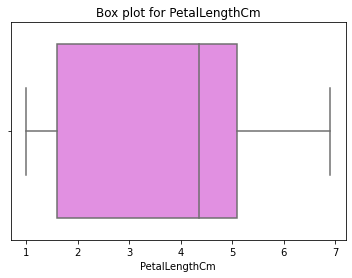

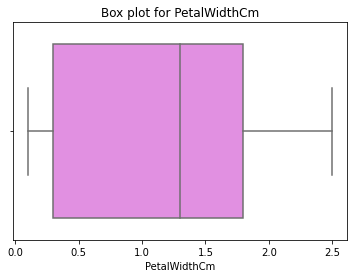

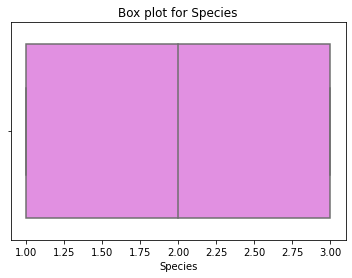

In [ ]:
for i in file.columns:
    plt.title("Box plot for "+ i)
    sns.boxplot(file[i],color='violet')
    plt.show()

In [ ]:
# Splitting of the data

X = file.drop('Species',axis= 1)
Y = file.Species

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=4)

In [ ]:
# Fit the model

logreg = LogisticRegression()

logreg.fit(X_train,Y_train)

y_pred=logreg.predict(X_test)

In [ ]:
# Confusion matrix

conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
conf_matrix

array([[18,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]], dtype=int64)

In [ ]:
# Accuracy calculation

acc = metrics.accuracy_score(Y_test,y_pred)
acc_percentage = 100*acc

acc_percentage

100.0

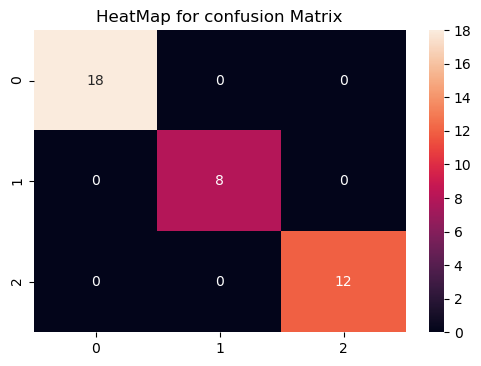

In [ ]:
# Representaion of confusion matrix
plt.figure(dpi=100)
plt.title("HeatMap for confusion Matrix")
sns.heatmap(pd.DataFrame(conf_matrix), annot=True)
plt.show()